In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [2]:
!cp "/content/drive/MyDrive/Colab Notebooks/Bangladesh/Temp_and_rain.csv" "/content/bangladeshweather.csv"

In [3]:
df = pd.read_csv('/content/bangladeshweather.csv')
df

,tem,Month,Year,rain
0,16.9760,1,1901,18.53560
1,19.9026,2,1901,16.25480
2,24.3158,3,1901,70.79810
3,28.1834,4,1901,66.16160
4,27.8892,5,1901,267.21500
...,...,...,...,...
1375,28.0642,8,2015,512.12700
1376,28.1230,9,2015,353.86900
1377,26.8624,10,2015,81.59940
1378,23.1842,11,2015,4.60815


In [4]:
df.columns

Index(['tem', 'Month', 'Year', 'rain'], dtype='object')

In [11]:
df['Day'] = 1

In [12]:
df['date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

In [16]:
df.drop(['datetime'], axis=1)


,tem,Month,Year,rain,Day,date
0,16.9760,1,1901,18.53560,1,1901-01-01
1,19.9026,2,1901,16.25480,1,1901-02-01
2,24.3158,3,1901,70.79810,1,1901-03-01
3,28.1834,4,1901,66.16160,1,1901-04-01
4,27.8892,5,1901,267.21500,1,1901-05-01
...,...,...,...,...,...,...
1375,28.0642,8,2015,512.12700,1,2015-08-01
1376,28.1230,9,2015,353.86900,1,2015-09-01
1377,26.8624,10,2015,81.59940,1,2015-10-01
1378,23.1842,11,2015,4.60815,1,2015-11-01


In [17]:
df.index = pd.to_datetime(df['date'], format='%Y-%m-%d')
df[:25]

,tem,Month,Year,rain,datetime,Day,date
date,,,,,,,
1901-01-01,16.9760,1,1901,18.53560,0 1901\n1 1901\n2 1901\n3 ...,1,1901-01-01
1901-02-01,19.9026,2,1901,16.25480,0 1901\n1 1901\n2 1901\n3 ...,1,1901-02-01
1901-03-01,24.3158,3,1901,70.79810,0 1901\n1 1901\n2 1901\n3 ...,1,1901-03-01
1901-04-01,28.1834,4,1901,66.16160,0 1901\n1 1901\n2 1901\n3 ...,1,1901-04-01
1901-05-01,27.8892,5,1901,267.21500,0 1901\n1 1901\n2 1901\n3 ...,1,1901-05-01
1901-06-01,28.8925,6,1901,341.04200,0 1901\n1 1901\n2 1901\n3 ...,1,1901-06-01
1901-07-01,28.3327,7,1901,540.90700,0 1901\n1 1901\n2 1901\n3 ...,1,1901-07-01
1901-08-01,27.9243,8,1901,493.21000,0 1901\n1 1901\n2 1901\n3 ...,1,1901-08-01
1901-09-01,27.6057,9,1901,291.54900,0 1901\n1 1901\n2 1901\n3 ...,1,1901-09-01


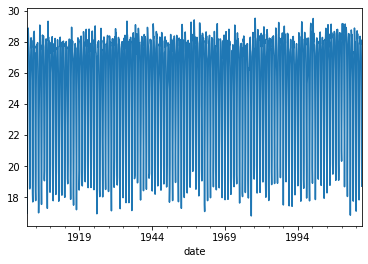

In [18]:
temp = df['tem']
temp.plot()

In [19]:
#df[' _tempm'].fillna(df[' _tempm'].mean(), inplace = True)
#df[' _tempm'] = df[' _tempm'].interpolate()

In [20]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [21]:
WINDOW_SIZE = 30
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((1350, 30, 1), (1350,))

In [22]:
temp_df = pd.DataFrame({'Temperature':temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Temperature,Seconds
date,,
1901-01-01,16.9760,-2.177453e+09
1901-02-01,19.9026,-2.174774e+09
1901-03-01,24.3158,-2.172355e+09
1901-04-01,28.1834,-2.169677e+09
1901-05-01,27.8892,-2.167085e+09
...,...,...
2015-08-01,28.0642,1.438387e+09
2015-09-01,28.1230,1.441066e+09
2015-10-01,26.8624,1.443658e+09


In [23]:
day = 60*60*24
year = 365.2425*day

temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2* np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))
temp_df.head()

,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
date,,,,,,
1901-01-01,16.9760,-2.177453e+09,2.179044e-11,1.0,-0.004602,0.999989
1901-02-01,19.9026,-2.174774e+09,-5.025931e-12,1.0,0.504398,0.863471
1901-03-01,24.3158,-2.172355e+09,-1.082172e-12,1.0,0.847024,0.531554
1901-04-01,28.1834,-2.169677e+09,1.205289e-12,1.0,0.999632,0.027145
1901-05-01,27.8892,-2.167085e+09,1.374613e-11,1.0,0.882833,-0.469686


In [24]:
temp_df = temp_df.drop('Seconds', axis=1)
temp_df.head()

,Temperature,Day sin,Day cos,Year sin,Year cos
date,,,,,
1901-01-01,16.9760,2.179044e-11,1.0,-0.004602,0.999989
1901-02-01,19.9026,-5.025931e-12,1.0,0.504398,0.863471
1901-03-01,24.3158,-1.082172e-12,1.0,0.847024,0.531554
1901-04-01,28.1834,1.205289e-12,1.0,0.999632,0.027145
1901-05-01,27.8892,1.374613e-11,1.0,0.882833,-0.469686


In [25]:
def df_to_X_y2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [26]:
WINDOW_SIZE = 30
X2, y2 = df_to_X_y2(temp_df, WINDOW_SIZE)
X2.shape, y2.shape

((1350, 30, 5), (1350,))

In [27]:
X2_train, y2_train = X2[:1080], y2[:1080]
X2_val, y2_val = X2[1080:1215], y2[1080:1215]
X2_test, y2_test = X2[1215:], y2[1215:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((1080, 30, 5), (1080,), (135, 30, 5), (135,), (135, 30, 5), (135,))

In [28]:
temp_training_mean = np.mean(X2_train[:, :, 0])
temp_training_std = np.std(X2_train[:, :, 0])
                           
def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  return X

In [29]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[ 6.53784975e-01,  2.07481030e-12,  1.00000000e+00,
          9.99830399e-01,  1.84166820e-02],
        [ 8.13243519e-01,  6.37318999e-14,  1.00000000e+00,
          8.78699346e-01, -4.77375596e-01],
        [ 8.96056544e-01,  2.35119213e-12,  1.00000000e+00,
          5.14002739e-01, -8.57788543e-01],
        ...,
        [ 7.28990504e-01, -6.41842923e-13,  1.00000000e+00,
          1.49013541e-02, -9.99888969e-01],
        [ 9.57813108e-01,  1.64561730e-12,  1.00000000e+00,
         -4.95477254e-01, -8.68620913e-01],
        [ 8.96898803e-01, -1.06188377e-11,  1.00000000e+00,
         -8.68253095e-01, -4.96121521e-01]],

       [[ 8.13243519e-01,  6.37318999e-14,  1.00000000e+00,
          8.78699346e-01, -4.77375596e-01],
        [ 8.96056544e-01,  2.35119213e-12,  1.00000000e+00,
          5.14002739e-01, -8.57788543e-01],
        [ 7.86019552e-01,  3.40113731e-13,  1.00000000e+00,
          2.37591000e-02, -9.99717713e-01],
        ...,
        [ 9.57813108e-01,  1.6456173

In [30]:
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model4 = Sequential()
model4.add(InputLayer((30, 5)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                17920     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________


In [31]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [32]:
history1 = model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp4])

Epoch 1/10
34/34 [==============================] - ETA: 0s - loss: 629.4338 - root_mean_squared_error: 25.0885

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


34/34 [==============================] - 8s 174ms/step - loss: 629.4338 - root_mean_squared_error: 25.0885 - val_loss: 642.8493 - val_root_mean_squared_error: 25.3545
Epoch 2/10
34/34 [==============================] - ETA: 0s - loss: 618.3783 - root_mean_squared_error: 24.8672

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


34/34 [==============================] - 5s 147ms/step - loss: 618.3783 - root_mean_squared_error: 24.8672 - val_loss: 628.8094 - val_root_mean_squared_error: 25.0761
Epoch 3/10
32/34 [===========================>..] - ETA: 0s - loss: 595.2630 - root_mean_squared_error: 24.3980

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


34/34 [==============================] - 5s 159ms/step - loss: 592.6840 - root_mean_squared_error: 24.3451 - val_loss: 578.0407 - val_root_mean_squared_error: 24.0425
Epoch 4/10
34/34 [==============================] - ETA: 0s - loss: 505.9117 - root_mean_squared_error: 22.4925

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


34/34 [==============================] - 5s 141ms/step - loss: 505.9117 - root_mean_squared_error: 22.4925 - val_loss: 468.0997 - val_root_mean_squared_error: 21.6356
Epoch 5/10
31/34 [==========================>...] - ETA: 0s - loss: 420.9498 - root_mean_squared_error: 20.5171

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


34/34 [==============================] - 5s 158ms/step - loss: 418.1526 - root_mean_squared_error: 20.4488 - val_loss: 401.0577 - val_root_mean_squared_error: 20.0264
Epoch 6/10
33/34 [============================>.] - ETA: 0s - loss: 362.6067 - root_mean_squared_error: 19.0422

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


34/34 [==============================] - 5s 160ms/step - loss: 361.6892 - root_mean_squared_error: 19.0181 - val_loss: 350.6572 - val_root_mean_squared_error: 18.7258
Epoch 7/10
32/34 [===========================>..] - ETA: 0s - loss: 318.0954 - root_mean_squared_error: 17.8352

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


34/34 [==============================] - 5s 149ms/step - loss: 316.8362 - root_mean_squared_error: 17.7999 - val_loss: 308.9941 - val_root_mean_squared_error: 17.5782
Epoch 8/10
33/34 [============================>.] - ETA: 0s - loss: 280.4998 - root_mean_squared_error: 16.7481

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


34/34 [==============================] - 5s 162ms/step - loss: 279.1989 - root_mean_squared_error: 16.7092 - val_loss: 274.1443 - val_root_mean_squared_error: 16.5573
Epoch 9/10
33/34 [============================>.] - ETA: 0s - loss: 247.8842 - root_mean_squared_error: 15.7443

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


34/34 [==============================] - 5s 155ms/step - loss: 247.9692 - root_mean_squared_error: 15.7470 - val_loss: 244.9656 - val_root_mean_squared_error: 15.6514
Epoch 10/10
34/34 [==============================] - ETA: 0s - loss: 221.8059 - root_mean_squared_error: 14.8932

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


34/34 [==============================] - 6s 176ms/step - loss: 221.8059 - root_mean_squared_error: 14.8932 - val_loss: 220.3865 - val_root_mean_squared_error: 14.8454


In [ ]:
from tensorflow.keras.models import load_model
model4 = load_model('model4/')

In [ ]:
train_predictions1 = model4.predict(X2_train).flatten()
train_results1 = pd.DataFrame(data={'Train Predictions':train_predictions1, 'Actuals':y2_train})
train_results1

,Train Predictions,Actuals
0,-9.668501,-9.67
1,-9.678443,-9.68
2,-9.687255,-9.90
3,-9.952663,-9.91
4,-9.900655,-9.51
...,...,...
336435,13.420260,13.53
336436,13.431778,13.40
336437,13.248212,13.26
336438,13.125502,13.16


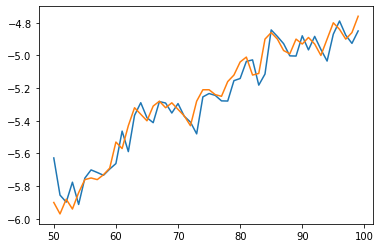

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results1['Train Predictions'][50:100])
plt.plot(train_results1['Actuals'][50:100])

In [ ]:
val_predictions1 = model4.predict(X2_val).flatten()
val_results1 = pd.DataFrame(data={'Val Predictions':val_predictions1, 'Actuals':y2_val})
val_results1

,Val Predictions,Actuals
0,13.051967,13.13
1,13.061429,13.06
2,12.958223,12.88
3,12.740448,12.77
4,12.687633,12.73
...,...,...
42051,1.908525,1.93
42052,1.900834,1.93
42053,1.906723,1.93
42054,1.907543,1.87


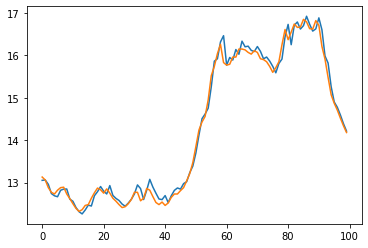

In [ ]:
plt.plot(val_results1['Val Predictions'][:100])
plt.plot(val_results1['Actuals'][:100])

In [ ]:
test_predictions1 = model4.predict(X2_test).flatten()
test_results1 = pd.DataFrame(data={'Test Predictions':test_predictions1, 'Actuals':y2_test})
test_results1

,Test Predictions,Actuals
0,1.861153,1.87
1,1.847525,1.86
2,1.837455,1.80
3,1.755143,1.80
4,1.795397,1.78
...,...,...
42020,-4.095587,-4.05
42021,-4.123203,-3.35
42022,-3.102801,-3.16
42023,-3.217141,-4.23


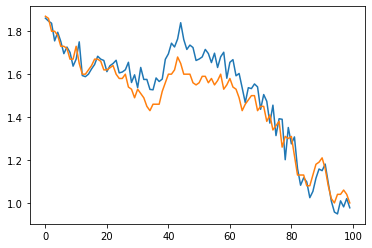

In [ ]:
plt.plot(test_results1['Test Predictions'][:100])
plt.plot(test_results1['Actuals'][:100])

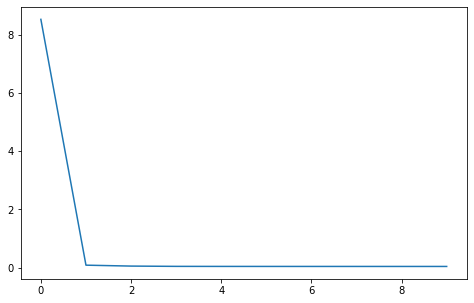

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history1.history['loss'])

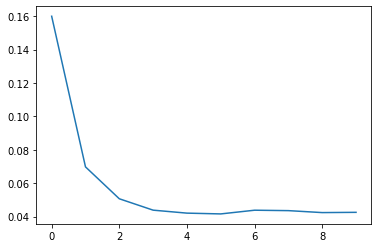

In [ ]:
plt.plot(history1.history['val_loss'])

In [ ]:
from sklearn.metrics import mean_squared_error as mse
def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

(       Predictions  Actuals
 0         1.861153     1.87
 1         1.847525     1.86
 2         1.837455     1.80
 3         1.755143     1.80
 4         1.795397     1.78
 ...            ...      ...
 42020    -4.095587    -4.05
 42021    -4.123203    -3.35
 42022    -3.102801    -3.16
 42023    -3.217141    -4.23
 42024    -4.671762    -4.82
 
 [42025 rows x 2 columns], 0.042394041164052335)

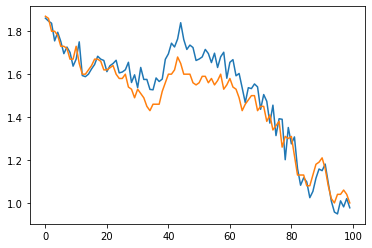

In [ ]:
plot_predictions1(model4, X2_test, y2_test)